
Задание 1.
Вы - менеджер по продажам в нефтехимической компании. Вы ведете несколько ключевых клиентов, которые закупают продукты вашей компании. Ваша компания запускает новый продукт - "Волшебный белый порошок" (ВБП), который по своим свойствам похож на тот, что уже есть на рынке. Ваши клиенты предпочитают формульный подход к ценообразованию. Вам нужно предложить клиентам формулу расчета цены на ВБП. В зависимости от объемов, которые покупают клиенты, им может быть предложена скидка.

Дополнительные вводные:
Так как продукт Б новый, возможно стоит предложить дисконт от цены Продукта А. Продукт производиться из нефти. Один из известных способов производства предполагает что из 16 баррелей нефти сделают одну тонну ВБП, а затраты на производство в районе 400 евро.

In [2]:

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from pandas_datareader import data as pdr
from bs4 import BeautifulSoup

In [3]:
from google.colab import files 
uploaded = files.upload()


Saving cur_oil.xlsx to cur_oil.xlsx


In [4]:
df = pd.read_excel('cur_oil.xlsx')
df

,Date,EURUSD=X,OIL
0,2018-01-01,1.2005,NaN
1,2018-01-02,1.2012,59.15
2,2018-01-03,1.2063,59.15
3,2018-01-04,1.2010,59.15
4,2018-01-05,1.2069,60.44
...,...,...,...
341,2019-04-23,1.1259,67.72
342,2019-04-24,1.1224,67.14
343,2019-04-25,1.1153,66.37
344,2019-04-26,1.1137,64.27


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      346 non-null    datetime64[ns]
 1   EURUSD=X  346 non-null    float64       
 2   OIL       332 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 8.2 KB


In [6]:
df.dropna()

,Date,EURUSD=X,OIL
1,2018-01-02,1.2012,59.15
2,2018-01-03,1.2063,59.15
3,2018-01-04,1.2010,59.15
4,2018-01-05,1.2069,60.44
5,2018-01-08,1.2037,60.44
...,...,...,...
341,2019-04-23,1.1259,67.72
342,2019-04-24,1.1224,67.14
343,2019-04-25,1.1153,66.37
344,2019-04-26,1.1137,64.27


In [7]:
# Затраты на производство
PRODUCTION_COST = 400 # (EUR)
PC = PRODUCTION_COST

# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
EL = EU_LOGISTIC_COST_EUR
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах
CL = CN_LOGISTIC_COST_USD

# * Справочная информация по клиентам(объемы, локации, комментарии) 
customers = {
    'Monty':{
        'location':'EU',
        'volumes':200,
        'comment':'moving_average'
    },
    
    'Triangle':{
        'location':'CN',
        'volumes': 30,
        'comment': 'monthly'
    },
    'Stone':{
        'location':'EU',
        'volumes': 150,
        'comment': 'moving_average'
    },
    'Poly':{
        'location':'EU',
        'volumes': 70,
        'comment': 'monthly'
    }
}
# Скидки
discounts = {'up to 100': 0.01, # 1%
             'up to 300': 0.05, # 5%
             '300 plus': 0.1}   #10%

Проанализировать имеющиеся данные.
Определить базовую формулу цены на условиях FCA (цена на заводе). То есть как бы выглядела цена на исторических данных.
Отобразить на графике.
Сделать расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой). Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.
Предложить формулу цены каждому из клиентов на условиях DDP (цена с доставкой).
Создать директорию «для клиентов» и в ней сложить файлы с расчетами.
Каждый клиент - отдельный файл (любой из docx, xlsx, pptx, pdf) с именем клиента…

In [14]:
# цена на заводе

price =  16 * df.OIL / df['EURUSD=X'] + 400   


In [15]:
# добавим колонку с результатом в df

df1 = df.assign(price = df['OIL']*16/df['EURUSD=X']+400)
df1

,Date,EURUSD=X,OIL,price
0,2018-01-01,1.2005,NaN,NaN
1,2018-01-02,1.2012,59.15,1187.878788
2,2018-01-03,1.2063,59.15,1184.547791
3,2018-01-04,1.2010,59.15,1188.009992
4,2018-01-05,1.2069,60.44,1201.259425
...,...,...,...,...
341,2019-04-23,1.1259,67.72,1362.359002
342,2019-04-24,1.1224,67.14,1357.091946
343,2019-04-25,1.1153,66.37,1352.138438
344,2019-04-26,1.1137,64.27,1323.336626


,Date,EURUSD=X,OIL,price
0,2018-01-01,1.2005,NaN,NaN
1,2018-01-02,1.2012,59.15,1187.878788
2,2018-01-03,1.2063,59.15,1184.547791
3,2018-01-04,1.2010,59.15,1188.009992
4,2018-01-05,1.2069,60.44,1201.259425


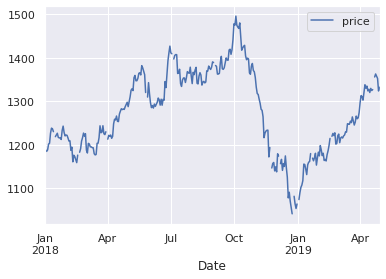

In [19]:
# отобразила на графике

df1.plot(x='Date', y='price')
df1.head(5)

In [20]:
# добавим колонку с рассчетом цены для каждого клиента

df2 = df1.assign(eur = df1.price + 30)
df2


,Date,EURUSD=X,OIL,price,eur
0,2018-01-01,1.2005,NaN,NaN,NaN
1,2018-01-02,1.2012,59.15,1187.878788,1217.878788
2,2018-01-03,1.2063,59.15,1184.547791,1214.547791
3,2018-01-04,1.2010,59.15,1188.009992,1218.009992
4,2018-01-05,1.2069,60.44,1201.259425,1231.259425
...,...,...,...,...,...
341,2019-04-23,1.1259,67.72,1362.359002,1392.359002
342,2019-04-24,1.1224,67.14,1357.091946,1387.091946
343,2019-04-25,1.1153,66.37,1352.138438,1382.138438
344,2019-04-26,1.1137,64.27,1323.336626,1353.336626


In [24]:
# сохранила как файл csv

df2.to_csv('europe.csv')

In [22]:
df3 = df1.assign(chi = df1.price + 130)
df3


,Date,EURUSD=X,OIL,price,chi
0,2018-01-01,1.2005,NaN,NaN,NaN
1,2018-01-02,1.2012,59.15,1187.878788,1317.878788
2,2018-01-03,1.2063,59.15,1184.547791,1314.547791
3,2018-01-04,1.2010,59.15,1188.009992,1318.009992
4,2018-01-05,1.2069,60.44,1201.259425,1331.259425
...,...,...,...,...,...
341,2019-04-23,1.1259,67.72,1362.359002,1492.359002
342,2019-04-24,1.1224,67.14,1357.091946,1487.091946
343,2019-04-25,1.1153,66.37,1352.138438,1482.138438
344,2019-04-26,1.1137,64.27,1323.336626,1453.336626


In [25]:
df3.to_csv('china.csv')

In [23]:
# Создать директорию «для клиентов» и в ней сложить файлы с расчетами
import os

# определим имя директории, которую создаём
path = "/tmp/price"

try:
    os.mkdir(path)
except OSError:
    print ("Создать директорию %s не удалось" % path)
else:
    print ("Успешно создана директория %s " % path)

Успешно создана директория /tmp/price 



Задание 2. Продолжение
Клиенты согласились на ваше предложение. Вам нужно сделать написать скрипт, с помощью которого можно автоматом рассчитывать цены для всех клиентов одновременно. Важный момент: данные для расчета скрипт должен подтягивать сам.

В результате должно быть 3 файла

Ноутбук с расчетами и графиками (чтобы данные подтягивались туда)
Скрипт, который делает расчет цены для клиента (чтобы данные подтягивались туда сами)

In [31]:
# напи сала формулу для рассчета, если используем данные из датафрейм

price_eur =  16 * df.OIL / df['EURUSD=X'] + 400  + 30
price_chi = 16 * df.OIL / df['EURUSD=X'] + 400  + 130
print('Цена для клиентов из Европы', price_eur, 'Цена для клиентов из Китая', price_chi)

Цена для клиентов из Европы 0              NaN
1      1217.878788
2      1214.547791
3      1218.009992
4      1231.259425
          ...     
341    1392.359002
342    1387.091946
343    1382.138438
344    1353.336626
345    1361.874439
Length: 346, dtype: float64 Цена для клиентов из Китая 0              NaN
1      1317.878788
2      1314.547791
3      1318.009992
4      1331.259425
          ...     
341    1492.359002
342    1487.091946
343    1482.138438
344    1453.336626
345    1461.874439
Length: 346, dtype: float64


In [33]:
# но курс доллара и цена на нефть ежедневно меняется, написала формулу, в которую нужно посдставлять свежие данные

n = int(input()) # цена нефти сегодня
m = int(input()) # курс евро сегодня
p = int(input()) # курс доллара сегодня

price_eu = 16*n/m + 30
price_ch = 16*n/p +130

print(price_eu, price_ch)

58
86
78
40.7906976744186 141.8974358974359
